0.1435550163695321


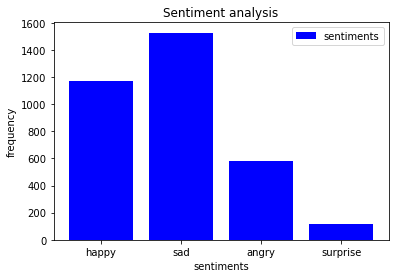

In [7]:
from tkinter import *
from tkinter import font  as tkfont
from tkinter import messagebox
import webbrowser
from facepy import GraphAPI
from tkinter.scrolledtext import ScrolledText
import analysesir as an
from tkinter import filedialog
import tkinter
class Application(Tk):
    def __init__(self, *args, **kwargs):
        Tk.__init__(self, *args, **kwargs)
        #self.wn_attributes("-transparent","white")
        self.name=''
        container = Frame(self)
        container.grid()
        self.resizable(False,False)
        self.geometry("840x550")
        self.configure(background='light blue')
        self.frames = {}
        for F in (Login1, WelcomePage2, SignUp3,fb4,Guest):
            page_name = F.__name__
            frame = F(parent=container, controller=self)
            self.frames[page_name] = frame
            frame.grid(row=0, column=0, sticky="nsew")
        self.show_frame("Login1")
        self.frames["Login1"].quicklogin(self)
    def show_frame(self, page_name):
        '''Show a frame for the given page name'''
        frame = self.frames[page_name]
        frame.tkraise()
#this is first page where user login account
name=""
usercheck=0
class Login1(Frame):
    def welcome(self):
        global name
        global usercheck
        if usercheck==1:
            messagebox.showinfo(title="User",message="hello "+name)
    def guest(self):
        messagebox.showinfo(title="Guest Log in",message="Have Fun as a Guest User....")
        self.controller.show_frame("Guest")
        return
    def quicklogin(self,controller):
        username=self.nameinput.get()
        password=self.passinput.get()
        if username=="" or password=="":
            f=open("quicklogin.txt","r")
            data=f.read()
            if data!="":
                self.nameinput.insert(END,data.split(",")[0])   
                self.passinput.insert(END,data.split(",")[1])   
                self.verifyuser(controller)
        else:
            f=open("quicklogin.txt","w")
            f.write(username+","+password)
            f.close()

    def __init__(self, parent, controller):
        Frame.__init__(self, parent)
        self.controller = controller
        self.configure(background="light blue")        
        # self.photo10=PhotoImage(file="52214-99d6ed0097bb307b7c1536751bd0ef27.png")
        # label10=Label(self,image=self.photo10,width=800,height=600,bg="linecacheght blue")
        # label10.grid(row=1,columnspan=10,rowspan=10)

        self.photo20=PhotoImage(file="logo1.png")
        label20=Label(self,image=self.photo20,bg="light blue")
        label20.grid(row=0,column=0,rowspan=3)

        label2= Label(self, text="  Sentiment Analysis",bg="light blue",font=("aerial",35))
        label2.grid(row=1,column=1,columnspan=3)
        ####
        label=Label(self,bg="light blue")# This is blank label used to make space 
        label.grid()
        ####

        Label(self,text="                                     ",bg="light blue").grid(row=2,column=3,sticky=E)
        guest=Button(self,text="Guest Login",command=self.guest,bg="green",fg="white")
        guest.grid(row=2,column=4,sticky=E)
        #email input
        self.username=Label(self,text="Email:",bg="light blue")
        self.username.grid(row=2,column=1,sticky=W)
        self.nameinput=Entry(self)
        self.nameinput.grid(row=2,column=2,sticky=W)
        #password input
        self.password=Label(self,text="Password:",bg="light blue")
        self.password.grid(row=3,column=1,sticky=W)
        self.passinput=Entry(self)
        self.passinput.grid(row=3,column=2,sticky=W)

        label=Label(self,bg="light blue").grid(row=4,column=0) # this is blank label used to make space 

        #check button
        self.var=IntVar()
        check = Checkbutton (self,text = "Keep me logged in",bg="light blue",variable=self.var)
        check.grid(row=4,column=1)
        ####
        label=Label(self,bg="light blue").grid(row=5,column=0,sticky=E) # this is blank label used to make space 

        #log in button
        button1 = Button(self, text="Log IN",bg="green",fg="white",command=lambda:[self.verifyuser(controller),self.welcome()])
        button1.grid(row=5,column=1,sticky=W)
        #create account button
        button2 = Button(self, text="Create an account",bg="pink",fg="white",command=lambda: controller.show_frame("SignUp3"))
        button2.grid(row=5,column=2,sticky=W)
    def verifyuser(self,controller):
        check=0
        fo=open("user.txt","r")
        user1=fo.read()
        user=user1.split("\n")
        for i in user:
            user=i.split(",")
            if(self.nameinput.get())==user[2]:
                if(self.passinput.get()==user[1]):
                    #controller.name=user[0]
                    global name
                    name=user[0]
                    controller.frames['WelcomePage2']#it will print username at the welcome page
                    check=1
                break;          
        fo.close()
        if self.nameinput.get()=='' or check==0:
            global usercheck
            usercheck=0
            messagebox.showinfo(title="Error",message="User not found, Please Enter a Registered User")
        if self.var.get()==1:
            print(self.var.get())
            self.quicklogin(controller)
        if check==1:
             self.nameinput.delete(0,END)
             self.passinput.delete(0,END)
             usercheck=1
             messagebox.showinfo(title="Log In message",message="Congratulations, You have successfully Logged in")              
             self.controller.show_frame("WelcomePage2")
        
class Guest(Frame):
    def analyser(self):
        self.line=self.box1.get('1.0', END+'-1c')
        self.line=an.main(self.line)
        self.box2.delete('1.0',END)
        self.box2.insert(END,self.line)
        self.emotionlist=an.check_emotion(self.line)
        if self.box1.get('1.0', END+'-1c')=="":
            messagebox.showinfo(title="Early analysis error",message="First Enter your text into First Text box")
        else:
            check=an.maxpolarity()
            if check==0:
                self.res=' Polarity: '+an.polarity(self.box2.get('1.0', END+'-1c'))+'\n File is not related to \n any of the sentiment defined'
                self.label100.config(text=self.res)
            else:
                self.res=' Polarity: '+an.polarity(self.box2.get('1.0', END+'-1c'))+'\n File is related to '+check
                self.label100.config(text=self.res)
        return 
    def results(self):
        lista=self.emotionlist
        c=lista
        self.happy.delete(0,END)
        self.happy.insert(0,c[0])
        self.sad.delete(0,END)       
        self.sad.insert(0,c[1])
        self.angry.delete(0,END)        
        self.angry.insert(0,c[2])
        self.surprise.delete(0,END)            
        self.surprise.insert(0,c[3])
        return
    def __init__(self, parent, controller):
        Frame.__init__(self, parent)
        self.controller = controller
        self.configure(background='light blue')

        self.photo10=PhotoImage(file="52214-99d6ed0097bb307b7c1536751bd0ef27.png")
        label10=Label(self,image=self.photo10,width=800,height=600,bg="light blue")
        label10.grid(row=1,columnspan=10,rowspan=12)

        self.photo20=PhotoImage(file="logo1.png")
        label20=Label(self,image=self.photo20,bg="light blue")
        label20.grid(row=0,column=0,rowspan=3)

        label2= Label(self, text="  Sentiment Analysis",bg="light blue",justify=CENTER,width=20,font=("aerial",35))
        label2.grid(row=1,column=1,columnspan=10)
        ####
        label=Label(self,bg="light blue").grid()# this is blank label used to make space
        
        label = Label(self, text="Enter Text to Analyze:")
        label.grid(row=3,column=1)
        #text box
        self.box1=ScrolledText(self,height=10,width=30)
        self.box1.grid(row=4,column=1)

        label1 = Label(self, text="Text after Analysis:")
        label1.grid(row=3,column=4,columnspan=2)

        button = Button(self, text="Go to Log in page",command=lambda:[controller.show_frame("Login1"),clr()])
        button.grid(row=2,column=5) 
        
        but=Button(self,text="Plot Graph",command=lambda:[an.plot()],fg="green",bg="white",font=("aerial",10))
        but.grid(row=3,column=5)
        
        Label(self,bg="light blue").grid(row=4,column=3)# this is blank label used to make space
        #text box
        self.box2=ScrolledText(self,height=10,width=30)
        self.box2.grid(row=4,column=4)        

        analyze=Button(self,text="Analyse",bg="blue",fg="white",command=lambda:[self.analyser(),self.results()])
        analyze.grid(row=5,column=1)

        def clr():
            self.box1.delete('1.0',END)
            self.box2.delete('1.0',END)
            self.happy.delete(0,END)
            self.sad.delete(0,END)
            self.angry.delete(0,END)
            self.surprise.delete(0,END)
            return
                
        Label(self,text="Happy:",bg="light blue").grid(row=6,column=1)
        self.happy=Entry(self,width=4)
        self.happy.grid(row=6,column=2,sticky=W)
        Label(self,text="Sad:",bg="light blue").grid(row=7,column=1)
        self.sad=Entry(self,width=4)
        self.sad.grid(row=7,column=2,sticky=W)
        Label(self,text="Angry:",bg="light blue").grid(row=8,column=1)
        self.angry=Entry(self,width=4)
        self.angry.grid(row=8,column=2,sticky=W)
        Label(self,text="Surprise:",bg="light blue").grid(row=9,column=1)
        self.surprise=Entry(self,width=4)
        self.surprise.grid(row=9,column=2,sticky=W)
        self.res=''
        self.label100=Label(self,text=self.res,justify="left",bg="light blue",font=("aerial",15))
        self.label100.grid(row=8,column=4,columnspan=3,rowspan=4)
        return

class SignUp3(Frame):
   
    def __init__(self, parent, controller):
        Frame.__init__(self, parent)
        self.controller = controller
        self.configure(background='light blue')
       
        self.photo20=PhotoImage(file="logo1.png")
        label20=Label(self,image=self.photo20,bg="light blue")
        label20.grid(row=0,column=0,rowspan=3)

        label2= Label(self, text="  Sentiment Analysis",bg="light blue",font=("aerial",35))
        label2.grid(row=1,column=1,columnspan=3)
        ####
        label = Label(self, text="                             Sign Up ",bg="light blue",font=("Aerial",15))
        label.grid(row=2,column=2)
        ####
        username=Label(self,text="Name:",bg="light blue")
        username.grid(row=3,column=1,sticky=W)
        nameinput=Entry(self)
        nameinput.grid(row=3,column=2,sticky=W)
        
        password=Label(self,text="Password:",bg="light blue")
        password.grid(row=4,column=1,sticky=W)
        passinput=Entry(self)
        passinput.grid(row=4,column=2,sticky=W)

        cpassword=Label(self,text="Confirm Password:",bg="light blue")
        cpassword.grid(row=5,column=1,sticky=W)
        cpassinput=Entry(self)
        cpassinput.grid(row=5,column=2,sticky=W)

        mail=Label(self,text="E-Mail:",bg="light blue")
        mail.grid(row=6,column=1,sticky=W)
        mailin=Entry(self)
        mailin.grid(row=6,column=2,sticky=W)

        cmail=Label(self,text="Confirm Email:",bg="light blue")
        cmail.grid(row=7,column=1,sticky=W)
        cmailin=Entry(self)
        cmailin.grid(row=7,column=2,sticky=W)

        mobile=Label(self,text="Mobile:",bg="light blue")
        mobile.grid(row=8,column=1,sticky=W)
        mobilein=Entry(self)
        mobilein.grid(row=8,column=2,sticky=W)
        def clr():
            nameinput.delete(0,END)
            passinput.delete(0,END)
            cpassinput.delete(0,END)
            mailin.delete(0,END)
            cmailin.delete(0,END)
            mobilein.delete(0,END)
            
        button1 = Button(self, text="Already a Member",bg="light green",fg="black",command=lambda: [controller.show_frame("Login1"),clr()])
        button1.grid(row=9,column=1)
        button2 = Button(self, text="Sign Up",fg="blue",bg="white",command= lambda:[maincheck(),clr()])
        button2.grid(row=9,column=2)
        def namecheck():
            u1=nameinput.get()
            chk=True
            if " " not in u1:
                chk=False
            return chk
        def mailcheck():
            u3=mailin.get()
            u4=cmailin.get()
            chk=True
            if "@" not in u3 or "." not in u3:
                chk=False
            if u4!=u3:
                messagebox.showinfo(title="mail",message="Confirm Email not match")
            return chk
        def passcheck():
            chk=True
            u4=passinput.get()
            u5=cpassinput.get()
            if u5!=u4:
                chk=False
            if u5=="":
                chk=False
            return chk
        def mobilecheck():
            u2=mobilein.get()
            l=len(u2)
            chk=True
            if l<10 or l>10:
                chk=False
            return chk
        def maincheck():
            fr=open('user.txt','r')
            od=fr.read()
            fr.close()
            f=open('user.txt','w')
            if(not (namecheck())):
                messagebox.showinfo(title="error",message="pls enter your first name and last name")
            elif(not (passcheck())):
                messagebox.showinfo(title="Password Error",message="Please enter a valid password")
            elif(not (mailcheck())):
                messagebox.showinfo(title="mail",message="Please enter a valid Email Address")
            elif(not (mobilecheck())):
                messagebox.showinfo(title="Mobile Error",message="Please enter valid mobile Number")
            else:
                w=[od+"\n",nameinput.get()+","+passinput.get()+","+mailin.get()+","+mobilein.get()]
                st="".join(str(i) for i in w)
                f.write(st)
                f.close()
                messagebox.showinfo(title="Sign up",message="You have Successfully Created Your Account")
            return
                
class WelcomePage2(Frame):
    def logout(self):
        messagebox.showinfo(title="Log Out Window",message="You are about to logout")
        Login1.nameinput=""
        Login1.passinput=""
        fo=open("quicklogin.txt","w")
        fo.write("")
        fo.close()
        self.controller.show_frame("Login1")
        return
    def clr(self):
        self.box1.delete('1.0',END)
        self.box2.delete('1.0',END)
        self.happy.delete('1.0',END)
        self.sad.delete('1.0',END)
        self.angry.delete('1.0',END)
        self.surprise.delete('1.0',END)
        return
    def analyser(self):
        self.line=self.box1.get('1.0', END+'-1c')
        self.line1=an.main(self.line)
        self.box2.delete('1.0',END)
        self.box2.insert(END,self.line1)
        self.line3=self.box2.get('1.0', END+'-1c')
        self.emotions=an.check_emotion(self.line3)
        if self.box1.get('1.0', END+'-1c')=="":
            messagebox.showinfo(title="Early analysis error",message="First Enter your text into First Text box")
        else:
            check=an.maxpolarity()
            if check==0:
                self.res=' Polarity: '+an.polarity(self.box2.get('1.0', END+'-1c'))+'\n File is not related to \n any of the sentiment defined'
                self.label100.config(text=self.res)
            else:
                self.res=' Polarity: '+an.polarity(self.box2.get('1.0', END+'-1c'))+'\n File is related to '+check
                self.label100.config(text=self.res)
        return 
    def results(self):
        c=self.emotions
        self.happy.delete(0,END)
        self.happy.insert(0,c[0])
        self.sad.delete(0,END)       
        self.sad.insert(0,c[1])
        self.angry.delete(0,END)        
        self.angry.insert(0,c[2])
        self.surprise.delete(0,END)            
        self.surprise.insert(0,c[3])
        return
    def browse_button(self):                      #this function will return the path of the file selected
        self.filename =  filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("python files","*.py"),("all files","*.*")))
        filepath=self.filename
        fo=open(filepath,"r")
        self.lines=fo.read()
        self.box1.delete('1.0',END)
        self.box1.insert(END,self.lines)
        return
    def __init__(self, parent, controller):
        Frame.__init__(self, parent)
        self.controller = controller
        self.configure(background='light blue')
        self.photo10=PhotoImage(file="52214-99d6ed0097bb307b7c1536751bd0ef27.png")
        label10=Label(self,image=self.photo10,width=800,height=600,bg="light blue")
        label10.grid(row=1,columnspan=15,rowspan=15)

        self.photo20=PhotoImage(file="logo1.png")
        label20=Label(self,image=self.photo20,bg="light blue")
        label20.grid(row=0,column=0,rowspan=3)

        label2= Label(self, text="Sentiment Analysis",bg="light blue",font=("aerial",35))
        label2.grid(row=1,column=2,columnspan=6)
        ####
        but=Button(self,text="Plot Graph",command=lambda:[an.plot()],bg="white",fg="green")
        but.grid(row=4,column=8,sticky=E)
        
        button = Button(self, text="Log Out",bd=4,command=self.logout)
        button.grid(row=2,column=9)
        
        button1 = Button(self, text="Facebook",bg="blue",fg="white",command=lambda: controller.show_frame("fb4"))
        button1.grid(row=2,column=8,sticky=E)

        button3= Button(self, text="From File",bg="Yellow",fg="black",command=self.browse_button)
        button3.grid(row=2,column=7,sticky=E)
        
        label = Label(self, text="Enter Text to Analyze:",bg="light blue")
        label.grid(row=4,column=1)
        self.box1=ScrolledText(self,height=10,width=30)
        self.box1.grid(row=5,column=1,columnspan=3)
        
        label1 = Label(self, text="Text after Analysis:",bg="light blue")
        label1.grid(row=4,column=7)
        self.box2=ScrolledText(self,height=10,width=30)
        self.box2.grid(row=5,column=7,columnspan=3)   

        
        analyze=Button(self,text="Analyse",bg="blue",fg="white",command=lambda:[self.analyser(),self.results()])
        analyze.grid(row=6,column=1)

        Label(self,text="Happy:",bg="light blue").grid(row=8,column=2,sticky=W)
        self.happy=Entry(self,width=4)
        self.happy.grid(row=8,column=3,sticky=W)
        Label(self,text="Sad:",bg="light blue").grid(row=9,column=2,sticky=W)
        self.sad=Entry(self,width=4)
        self.sad.grid(row=9,column=3,sticky=W)
        Label(self,text="Angry:",bg="light blue").grid(row=10,column=2,sticky=W)
        self.angry=Entry(self,width=4)
        self.angry.grid(row=10,column=3,sticky=W)
        Label(self,text="Surprise:",bg="light blue").grid(row=11,column=2,sticky=W)
        self.surprise=Entry(self,width=4)
        self.surprise.grid(row=11,column=3,sticky=W)
        self.res=''
        self.label100=Label(self,text=self.res,justify="left",bg="light blue",font=("aerial",15))
        self.label100.grid(row=8,column=6,columnspan=3,rowspan=4)

class fb4(Frame):
    def logout(self):
        messagebox.showinfo(title="Log Out Window",message="You are about to logout")
        Login1.nameinput=""
        Login1.passinput=""
        fo=open("quicklogin.txt","w")
        fo.write("")
        fo.close()
        self.controller.show_frame("Login1")
        return
    def clr(self):
        self.box1.delete('1.0',END)
        self.box2.delete('1.0',END)
        self.happy.delete('1.0',END)
        self.sad.delete('1.0',END)
        self.angry.delete('1.0',END)
        self.surprise.delete('1.0',END)
        return
    def analyser(self):
        self.line=self.box1.get('1.0', END+'-1c')
        self.line=an.main(self.line)
        self.box2.delete('1.0',END)
        self.box2.insert(END,self.line)
        self.emotionlist=an.check_emotion(self.line)
        if self.box1.get('1.0', END+'-1c')=="":
            messagebox.showinfo(title="Early analysis error",message="First Enter your text into First Text box")
        else:
            check=an.maxpolarity()
            if check==0:
                self.res=' Polarity: '+an.polarity(self.box2.get('1.0', END+'-1c'))+'\n File is not related to \n any of the sentiment defined'
                self.label100.config(text=self.res)
            else:
                self.res=' Polarity: '+an.polarity(self.box2.get('1.0', END+'-1c'))+'\n File is related to '+check
                self.label100.config(text=self.res)
        return 
    def results(self):
        self.lista=self.emotionlist
        c=self.lista
        self.happy.delete(0,END)
        self.happy.insert(0,c[0])
        self.sad.delete(0,END)       
        self.sad.insert(0,c[1])
        self.angry.delete(0,END)        
        self.angry.insert(0,c[2])
        self.surprise.delete(0,END)            
        self.surprise.insert(0,c[3])
        return  
    def facepy(self):
        token=self.entry.get()
        graph = GraphAPI(token)
        #Get my latest posts
        self.a=graph.get('me/posts')
        self.box1.delete('1.0',END)
        self.box1.insert(END,self.a)
        return     
    def webopen(self):
        webbrowser.open("https://developers.facebook.com/tools/explorer/1394752890561838")
        return
    def __init__(self, parent, controller):
        Frame.__init__(self, parent)
        self.controller = controller
        self.configure(background="light blue")
        self.photo10=PhotoImage(file="52214-99d6ed0097bb307b7c1536751bd0ef27.png")
        label10=Label(self,image=self.photo10,width=800,height=600,bg="light blue")
        label10.grid(row=1,columnspan=10,rowspan=15)

        self.photo20=PhotoImage(file="logo1.png")
        label20=Label(self,image=self.photo20,bg="light blue")
        label20.grid(row=0,column=0,rowspan=3)

        label2= Label(self, text="Sentiment Analysis",bg="light blue",font=("aerial",35))
        label2.grid(row=1,column=1,columnspan=2)
        ####
        label=Label(self,bg="light blue")
        label.grid()
        ####
        butt=Button(self,text="Get Token Online ->",command=lambda:[self.webopen()],fg="white",bg="light green")
        butt.grid(row=1,column=3,columnspan=2,sticky=E)
        button2=Button(self,text="Go back ",bg="light blue",command=lambda:[controller.show_frame("WelcomePage2"),self.clr()])
        button2.grid(row=2,column=3,sticky=E)
        button = Button(self, text="Log Out",bg="light blue",command=self.logout)
        button.grid(row=2,column=4,sticky=W)
        but=Button(self,text="Plot Graph",command=an.plot,bg="white",fg="green")
        but.grid(row=3,column=4,sticky=W)

        self.label=Label(self,text="Please Enter your Access Token: ",bg="light blue")
        self.label.grid(row=2,column=1,columnspan=2,sticky=W)
        self.entry=Entry(self,width=60)
        self.entry.grid(row=3,column=1,columnspan=4,sticky=W)
        self.butt=Button(self,text="Submit Token",command=self.facepy)
        self.butt.grid(row=3,column=3,sticky=W)


        label1 = Label(self, text="Enter Text to Analyse:",bg="light blue")
        label1.grid(row=4,column=1,sticky=W)
        self.box1=ScrolledText(self,height=10,width=30)
        self.box1.grid(row=5,column=1,columnspan=4,sticky=W)
        
        label2 = Label(self, text="Text after Analysis:",bg="light blue")
        label2.grid(row=4,column=3,sticky=W)
        self.box2=ScrolledText(self,height=10,width=30)
        self.box2.grid(row=5,column=3,columnspan=2,sticky=W)   

        
        analyze=Button(self,text="Analyse",bg="blue",fg="white",command=lambda:[self.analyser(),self.results()])
        analyze.grid(row=6,column=1)

        Label(self,text="Happy:",bg="light blue").grid(row=8,column=1,sticky=E)
        self.happy=Entry(self,width=4)
        self.happy.grid(row=8,column=2,sticky=W)
        Label(self,text="Sad:",bg="light blue").grid(row=9,column=1,sticky=E)
        self.sad=Entry(self,width=4)
        self.sad.grid(row=9,column=2,sticky=W)
        Label(self,text="Angry:",bg="light blue").grid(row=10,column=1,sticky=E)
        self.angry=Entry(self,width=4)
        self.angry.grid(row=10,column=2,sticky=W)
        Label(self,text="Surprise:",bg="light blue").grid(row=11,column=1,sticky=E)
        self.surprise=Entry(self,width=4)
        self.surprise.grid(row=11,column=2,sticky=W)
        self.res=''
        self.label100=Label(self,text=self.res,justify="left",bg="light blue",font=("aerial",15))
        self.label100.grid(row=8,column=3,columnspan=3,rowspan=4)       
    
                
if __name__ == "__main__":
    app = Application()
    app.mainloop()
